In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import torch

mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['font.size'] = 14

In [13]:
from enum import Enum

class Label(Enum):
    DEEP_BREATH = 0
    DRY_COUGH = 1
    JUMPING_JACK = 2
    PUSH_UP = 3
    SWALLOWING = 4
    THROAT_CLEARING = 5

In [16]:
Label.DEEP_BREATH.value

0

In [20]:
class BaseLHMDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return self.features.shape[0]
    
class LHMMonoDataset(BaseLHMDataset):
    def __getitem__(self, idx):
        return self.features[idx, ...].transpose(0, 1).float(), self.labels[idx]

loader = torch.load('../../dataset/preprocessed/mono.pt')
samples = []
labels = []

for sample, label in loader:
    samples.append(sample.numpy())
    labels.append(label.numpy())

samples = np.array(samples)
labels = np.array(labels)

deep_breath_m = samples[np.where(labels == Label.DEEP_BREATH.value)[0], :, :]
dry_cough_m = samples[np.where(labels == Label.DRY_COUGH.value)[0], :, :]
throat_clearing_m = samples[np.where(labels == Label.THROAT_CLEARING.value)[0], :, :]
swallowing_m = samples[np.where(labels == Label.SWALLOWING.value)[0], :, :]

In [27]:
data = pd.read_csv('interpolated.csv', delimiter=',', header=None).to_numpy()
frames = data[:, 0]
c = data[:, 1]
b = data[:, 2]

discontinuities = np.where(np.diff(frames) != 1)[0] + 1
frame_sections = np.split(frames, discontinuities)
c_sections = np.split(c, discontinuities)
b_sections = np.split(b, discontinuities)

deep_breath = np.column_stack((frame_sections[0], c_sections[0], b_sections[0]))
dry_cough = np.column_stack((frame_sections[1], c_sections[1], b_sections[1]))
throat_clearing = np.column_stack((frame_sections[2], c_sections[2], b_sections[2]))
swallowing = np.column_stack((frame_sections[3], c_sections[3], b_sections[3]))

In [98]:
pv_color = ['#003388', '#2a97e9', '#f06a28', '#7e0000']
timestamps_m = np.arange(0, sample.shape[0], 1)/1000

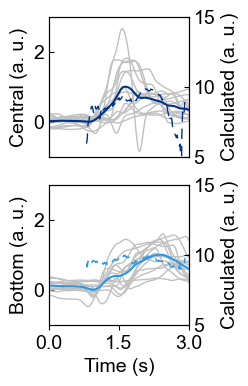

In [97]:
fig = plt.figure(figsize=(1.8, 4))

ax1_c = fig.add_subplot(211)
for sample in deep_breath_m:
    ax1_c.plot(timestamps_m, sample[:, 0],
            lw=1, c='silver')
ax1_c.plot(timestamps_m, np.mean(deep_breath_m, axis=0)[:, 0],
         lw=1.5, c=pv_color[0])    
ax1_c.set_xlim(0, 3)
ax1_c.set_ylim(-1, 3)
ax1_c.set_xticks([])
ax1_c.tick_params(axis='y', direction='in')
ax1_c.set_ylabel('Central (a. u.)')

ax2_c = ax1_c.twinx()
ax2_c.plot(0.8 + (deep_breath[:, 0] - deep_breath[0, 0])/60, deep_breath[:, 1],
         lw=1, ls=(0, (7.5, 5)), c=pv_color[0])
ax2_c.set_ylim(5, 15)
ax2_c.tick_params(axis='y', direction='in')
ax2_c.set_ylabel('Calculated (a. u.)')

ax1_b = fig.add_subplot(212)
for sample in deep_breath_m:
    ax1_b.plot(timestamps_m, sample[:, 1],
            lw=1, c='silver')
ax1_b.plot(timestamps_m, np.mean(deep_breath_m, axis=0)[:, 1],
         lw=1.5, c=pv_color[1])    
ax1_b.set_xlim(0, 3)
ax1_b.set_ylim(-1, 3)
ax1_b.set_xticks([0, 1.5, 3])
ax1_b.set_xlabel('Time (s)')
ax1_b.tick_params(axis='y', direction='in')
ax1_b.set_ylabel('Bottom (a. u.)')

ax2_b = ax1_b.twinx()
ax2_b.plot(0.8 + (deep_breath[:, 0] - deep_breath[0, 0])/60, deep_breath[:, 2]*2 - 13.5,
         lw=1, ls=(0, (7.5, 5)), c=pv_color[1])
ax2_b.set_ylim(5, 15)
ax2_b.tick_params(axis='y', direction='in')
ax2_b.set_ylabel('Calculated (a. u.)')

plt.savefig('deep_breath.png', dpi=600, bbox_inches='tight')
plt.show()

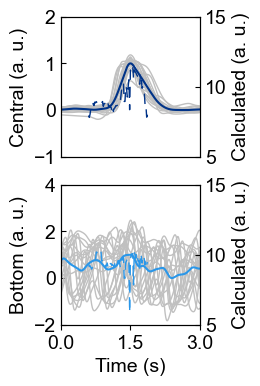

In [108]:
fig = plt.figure(figsize=(1.8, 4))

ax1_c = fig.add_subplot(211)
for sample in dry_cough_m:
    ax1_c.plot(timestamps_m, sample[:, 0],
            lw=1, c='silver')
ax1_c.plot(timestamps_m, np.mean(dry_cough_m, axis=0)[:, 0],
         lw=1.5, c=pv_color[0])    
ax1_c.set_xlim(0, 3)
ax1_c.set_ylim(-1, 2)
ax1_c.set_xticks([])
ax1_c.tick_params(axis='y', direction='in')
ax1_c.set_ylabel('Central (a. u.)')

ax2_c = ax1_c.twinx()
ax2_c.plot(0.6 + (dry_cough[:, 0] - dry_cough[0, 0])/60, dry_cough[:, 1],
         lw=1, ls=(0, (7.5, 5)), c=pv_color[0])
ax2_c.set_ylim(5, 15)
ax2_c.tick_params(axis='y', direction='in')
ax2_c.set_ylabel('Calculated (a. u.)')

ax1_b = fig.add_subplot(212)
for sample in dry_cough_m:
    ax1_b.plot(timestamps_m, sample[:, 1],
            lw=1, c='silver')
ax1_b.plot(timestamps_m, np.mean(dry_cough_m, axis=0)[:, 1],
         lw=1.5, c=pv_color[1])    
ax1_b.set_xlim(0, 3)
ax1_b.set_ylim(-2, 4)
ax1_b.set_xticks([0, 1.5, 3])
ax1_b.set_xlabel('Time (s)')
ax1_b.tick_params(axis='y', direction='in')
ax1_b.set_ylabel('Bottom (a. u.)')

ax2_b = ax1_b.twinx()
ax2_b.plot(0.6 + (dry_cough[:, 0] - dry_cough[0, 0])/60, dry_cough[:, 2]*2 - 13.5,
         lw=1, ls=(0, (7.5, 5)), c=pv_color[1])
ax2_b.set_ylim(5, 15)
ax2_b.tick_params(axis='y', direction='in')
ax2_b.set_ylabel('Calculated (a. u.)')

plt.savefig('dry_cough.png', dpi=600, bbox_inches='tight')
plt.show()

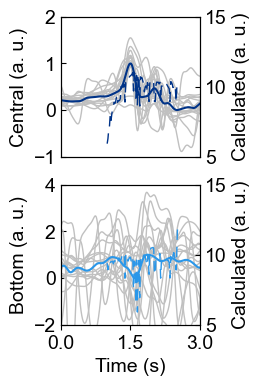

In [112]:
fig = plt.figure(figsize=(1.8, 4))

ax1_c = fig.add_subplot(211)
for sample in throat_clearing_m:
    ax1_c.plot(timestamps_m, sample[:, 0],
            lw=1, c='silver')
ax1_c.plot(timestamps_m, np.mean(throat_clearing_m, axis=0)[:, 0],
         lw=1.5, c=pv_color[0])    
ax1_c.set_xlim(0, 3)
ax1_c.set_ylim(-1, 2)
ax1_c.set_xticks([])
ax1_c.tick_params(axis='y', direction='in')
ax1_c.set_ylabel('Central (a. u.)')

ax2_c = ax1_c.twinx()
ax2_c.plot(1 + (throat_clearing[:, 0] - throat_clearing[0, 0])/60, throat_clearing[:, 1],
         lw=1, ls=(0, (7.5, 5)), c=pv_color[0])
ax2_c.set_ylim(5, 15)
ax2_c.tick_params(axis='y', direction='in')
ax2_c.set_ylabel('Calculated (a. u.)')

ax1_b = fig.add_subplot(212)
for sample in throat_clearing_m:
    ax1_b.plot(timestamps_m, sample[:, 1],
            lw=1, c='silver')
ax1_b.plot(timestamps_m, np.mean(throat_clearing_m, axis=0)[:, 1],
         lw=1.5, c=pv_color[1])    
ax1_b.set_xlim(0, 3)
ax1_b.set_ylim(-2, 4)
ax1_b.set_xticks([0, 1.5, 3])
ax1_b.set_xlabel('Time (s)')
ax1_b.tick_params(axis='y', direction='in')
ax1_b.set_ylabel('Bottom (a. u.)')

ax2_b = ax1_b.twinx()
ax2_b.plot(1 + (throat_clearing[:, 0] - throat_clearing[0, 0])/60, throat_clearing[:, 2]*2 - 13.5,
         lw=1, ls=(0, (7.5, 5)), c=pv_color[1])
ax2_b.set_ylim(5, 15)
ax2_b.tick_params(axis='y', direction='in')
ax2_b.set_ylabel('Calculated (a. u.)')

plt.savefig('throat_clearing.png', dpi=600, bbox_inches='tight')
plt.show()

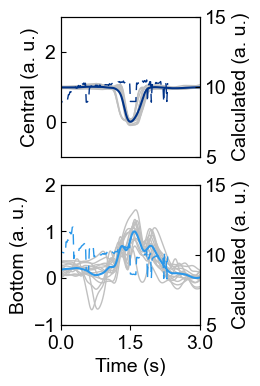

In [125]:
fig = plt.figure(figsize=(1.8, 4))

ax1_c = fig.add_subplot(211)
for sample in swallowing_m:
    ax1_c.plot(timestamps_m, sample[:, 0],
            lw=1, c='silver')
ax1_c.plot(timestamps_m, np.mean(swallowing_m, axis=0)[:, 0],
         lw=1.5, c=pv_color[0])    
ax1_c.set_xlim(0, 3)
ax1_c.set_ylim(-1, 3)
ax1_c.set_xticks([])
ax1_c.tick_params(axis='y', direction='in')
ax1_c.set_ylabel('Central (a. u.)')

ax2_c = ax1_c.twinx()
ax2_c.plot(-0.1 + (swallowing[:, 0] - swallowing[0, 0])/60, swallowing[:, 1],
         lw=1, ls=(0, (7.5, 5)), c=pv_color[0])
ax2_c.set_ylim(5, 15)
ax2_c.tick_params(axis='y', direction='in')
ax2_c.set_ylabel('Calculated (a. u.)')

ax1_b = fig.add_subplot(212)
for sample in swallowing_m:
    ax1_b.plot(timestamps_m, sample[:, 1],
            lw=1, c='silver')
ax1_b.plot(timestamps_m, np.mean(swallowing_m, axis=0)[:, 1],
         lw=1.5, c=pv_color[1])    
ax1_b.set_xlim(0, 3)
ax1_b.set_ylim(-1, 2)
ax1_b.set_xticks([0, 1.5, 3])
ax1_b.set_xlabel('Time (s)')
ax1_b.tick_params(axis='y', direction='in')
ax1_b.set_ylabel('Bottom (a. u.)')

ax2_b = ax1_b.twinx()
ax2_b.plot(-0.1 + (swallowing[:, 0] - swallowing[0, 0])/60, swallowing[:, 2]*2 - 13.5,
         lw=1, ls=(0, (7.5, 5)), c=pv_color[1])
ax2_b.set_ylim(5, 15)
ax2_b.tick_params(axis='y', direction='in')
ax2_b.set_ylabel('Calculated (a. u.)')

plt.savefig('swallowing.png', dpi=600, bbox_inches='tight')
plt.show()